# WordCloud

Nous allons maintenant nous concentrer sur le text mining d’un article de presse lié à nos données, afin d’identifier les mots-clés principaux. Le texte sera filtré, lemmatisé, puis les fréquences des termes seront visualisées sous forme de WordCloud.

Nous allons charger l'ensemble des librairies Python et le modèle linguistique français de `spaCy` pour préparer les opérations d'analyse sémantique.

In [1]:
# Installation des librairies
# !pip install unidecode wordcloud nltk spacy
# !python -m spacy download fr_core_news_md

import re
from unidecode import unidecode
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import defaultdict
import spacy

# Chargement du modèle français de spaCy. Modèle md qui est plus précis pour la lemmatisation et la reconnaissance des mots
nlp = spacy.load("fr_core_news_md")

In [2]:
# Article de presse provenant de https://www.lesechos.fr/economie-france/social/cinq-ans-apres-le-covid-lactivite-hospitaliere-retrouve-des-couleurs-2154382
article = """
Cinq ans après le Covid, l'activité hospitalière « retrouve des couleurs »
Le nombre de séjours à l'hôpital a augmenté de 3,7 % en 2024, selon le baromètre annuel de la Fédération hospitalière de France, permettant de résorber une partie du retard pris pendant la crise sanitaire.
L'activité hospitalière « retrouve des couleurs ». Dans la deuxième édition de son baromètre sur l'accès aux soins publiée ce lundi, cinq ans jour pour jour après l'entrée en vigueur du premier confinement pour faire face à l'épidémie de Covid, la Fédération hospitalière de France (FHF) estime qu'il y a eu 516.000 séjours à l'hôpital de plus qu'attendu en 2024.
Le nombre de séjours hospitaliers a augmenté de 3,7 %, et même de 4,6 % à l'hôpital public. Pour la première fois depuis 2020, « la dette de santé publique commence à se résorber », s'est félicité son président, Arnaud Robinet.
Entre 2019 et 2023, compte tenu notamment des perturbations liées au Covid, quelque 3,5 millions de séjours hospitaliers n'avaient pas pu être réalisés. Une situation qui serait synonyme de retard dans la prise en charge de certains cancers et du suivi des personnes âgées. La reprise constatée l'an dernier concerne toutes les classes d'âges à l'exception des plus de 85 ans qui continuent d'être en situation de sous recours (-6 % par rapport aux niveaux attendus).

Un retard important dans les chirurgies lourdes
Certaines disciplines, comme la neurologie, la rhumatologie, le cardio-vasculaire ou les prises en charge digestives restent cependant en difficulté. « Elles représentent un tiers des activités de médecine, pour un total de 180.000 séjours non réalisés », a indiqué la FHF. Un sous-recours est également constaté pour les chirurgies lourdes pour toutes les classes d'âges confondues. « Ce sont en tout 700.000 séjours de chirurgie qui n'ont pas été réalisés depuis 2020 », a-t-elle également alerté.
Autre point positif, dans son baromètre, la FHF constate que 37 % d'hôpitaux se sont déclarés « en tension » en 2024, soit une quarantaine de moins que l'année précédente. Ils sont également une cinquantaine d'hôpitaux en moins à avoir déclenché des plans blancs, ce protocole prévu par les autorités de santé pour faire face à ces situations exceptionnelles. Le rythme des fermetures de lits diminue aussi et de nombreux établissements anticipent des réouvertures dans certains secteurs en 2025.

« Tous les voyants sont au rouge écarlate »
Pour autant, « cette amorce de rémission n'efface pas la dégradation continue de l'accès aux soins des dernières années », a prévenu Arnaud Robinet. Le président de la FHF a notamment rappelé que « sur le plan financier, à l'hôpital comme dans les Ehpad publics, tous les voyants sont au rouge écarlate », avec un déficit atteignant 2,8 milliards d'euros fin 2024. Et l'accès aux soins se dégrade : selon un sondage Ipsos commandé par la FHF, plus de deux tiers des répondants déclarent avoir renoncé à au moins un acte de soins ces cinq dernières années. Deux sur trois (65 %) disent aussi « avoir peur d'être hospitalisés » au vu de la situation actuelle.
« Nous sommes à un tournant […], ou bien nous changeons de logiciel pour se donner les moyens d'amplifier la reprise », ou nous risquons « de voir notre système de santé s'affaiblir encore davantage », a-t-il averti.
En matière de financement, celui qui est aussi le maire (Horizons) de Reims a appelé l'Etat à soutenir cette « reprise ». Il propose la création d'un « Livret H », sur le modèle du Livret A utilisé pour le logement social. Ou encore un fonds vert destiné uniquement aux hôpitaux. Il remettra « aux pouvoirs publics en mai un cadre de loi de programmation en santé » car « le besoin d'une planification en santé n'a jamais été aussi urgent. »
"""

print(f"Longueur du texte : {len(article)} caractères.")

Longueur du texte : 3750 caractères.


Nous allons créer une fonction pour identifier et marquer les noms de personnes afin de les exclure, car ils ne font pas partie des mots-clés thématiques. Nous veillerons également à nettoyer le texte pour le rendre homogène, en supprimant majuscules, chiffres et ponctuation, tout en conservant les accents nécessaires à la lemmatisation.

In [3]:
# Fonction d'anonymisation basée sur spaCy
# La variable 'nlp' est chargée dans le Bloc 1
def anonymiser(texte):
    # Traitement du texte par le modèle spaCy (MD)
    doc = nlp(texte)
    resultat = texte
    
    # Remplacement de toutes les entités de type 'PER' (Personne)
    for ent in doc.ents:
        if ent.label_ == "PER":
            # Utilise la méthode de remplacement classique sur le texte original
            resultat = resultat.replace(ent.text, "nom_prenom")
            
    return resultat

In [4]:
# Application de l'anonymisation sur l'article
text_names_replaced = anonymiser(article) 

# On retire la chaîne de caractères "nom_prenom" car elle nous intéresse pas
text_names_replaced = text_names_replaced.replace('nom_prenom', '')

# Mise en minuscule
text_lower = text_names_replaced.lower()

# Variable contenant les accents
text_with_accents = text_lower

print(text_with_accents[:1000] + "...") # On affiche les 1000 premiers caractères


cinq ans après le covid, l'activité hospitalière « retrouve des couleurs »
le nombre de séjours à l'hôpital a augmenté de 3,7 % en 2024, selon le baromètre annuel de la fédération hospitalière de france, permettant de résorber une partie du retard pris pendant la crise sanitaire.
l'activité hospitalière « retrouve des couleurs ». dans la deuxième édition de son baromètre sur l'accès aux soins publiée ce lundi, cinq ans jour pour jour après l'entrée en vigueur du premier confinement pour faire face à l'épidémie de covid, la fédération hospitalière de france (fhf) estime qu'il y a eu 516.000 séjours à l'hôpital de plus qu'attendu en 2024.
le nombre de séjours hospitaliers a augmenté de 3,7 %, et même de 4,6 % à l'hôpital public. pour la première fois depuis 2020, « la dette de santé publique commence à se résorber », s'est félicité son président, .
entre 2019 et 2023, compte tenu notamment des perturbations liées au covid, quelque 3,5 millions de séjours hospitaliers n'avaient pas pu êt

In [5]:
# Suppression des nombres (car ils sont très présents et, si nous les avions remplacés par 'annee' (ou 'nombre'), ces mots seraient devenu les plus 
# fréquents du texte, apparaissant en très grand dans le WordCloud)
text_no_numbers = re.sub(r'[0-9]+', '', text_with_accents)

# Suppression de la ponctuation et caractères spéciaux (ne garder que les lettres a-z) (SAUF les accents)
# Le motif mis à jour autorise toutes les lettres minuscules (a-z) ET les accents français communs.
text_clean_chars = re.sub(r'[^a-zàâéèêëïîôöùûüÿçœæ\s]', ' ', text_no_numbers)

# Suppression des espaces multiples créés par les remplacements précédents
text_clean = re.sub(r'\s+', ' ', text_clean_chars).strip()

print(text_clean[:200] + "...") # On affiche les 200 premiers caractères

cinq ans après le covid l activité hospitalière retrouve des couleurs le nombre de séjours à l hôpital a augmenté de en selon le baromètre annuel de la fédération hospitalière de france permettant de ...


Nous voulons conserver que les noms communs et adjectifs significatifs, en excluant les noms propres, verbes, adverbes et stopwords.

In [6]:
# Tokenisation et Filtrage par Catégorie Grammaticale (POS)

# Traitement du texte nettoyé avec spaCy (text_clean contient les accents)
doc = nlp(text_clean)

# Liste des POS tags (catégories grammaticales) à CONSERVER
# On cible uniquement les Noms Communs et les Adjectifs
pos_to_keep = {'NOUN', 'ADJ'} # Noms Propres (PROPN) sont retirés ici

# Liste des stopwords de spaCy
final_stop_words = set(nlp.Defaults.stop_words) 

# Filtrage : le token est un mot-clé (NOUN/ADJ) ET n'est pas un stopword ET a plus de 3 lettres
tokens_filtered_for_lemmatization = []
for token in doc:
    token_text = token.text
    
    # Le filtre POS est appliqué
    if (token_text not in final_stop_words and 
        len(token_text) > 3 and 
        token.pos_ in pos_to_keep):
        
        tokens_filtered_for_lemmatization.append(token_text)

print(f"Les Noms Propres, Verbes et Adverbes ont été retirés.")
print(f"Nombre de tokens (Noms Communs/Adjectifs) conservés : {len(tokens_filtered_for_lemmatization)}")

Les Noms Propres, Verbes et Adverbes ont été retirés.
Nombre de tokens (Noms Communs/Adjectifs) conservés : 177


Nous allons lemmatiser le texte afin de réduire les mots à leur forme de base, ce qui permettra d’uniformiser le vocabulaire et d’éviter les doublons liés aux variations grammaticales. Ensuite, nous calculerons la fréquence de chaque lemme pour identifier les mots les plus récurrents dans le texte. Ces informations serviront à générer un WordCloud clair et représentatif des termes les plus importants.

In [7]:
# Lemmatisation

# Permet à spaCy de traiter la séquence (qui contient les accents)
text_for_lemmatization = " ".join(tokens_filtered_for_lemmatization)

# Traitement du texte avec spaCy
doc_lemmatized = nlp(text_for_lemmatization)

# Extraction du lemme pour chaque token
tokens_lemmatized_raw = [token.lemma_ for token in doc_lemmatized]

# Normalisation (retrait des accents) des lemmes pour le WordCloud
tokens_lemmatized = [unidecode(word) for word in tokens_lemmatized_raw]

print(f"Aperçu des 10 premiers lemmes : {tokens_lemmatized[:10]}")

Aperçu des 10 premiers lemmes : ['covid', 'activite', 'hospitalier', 'couleur', 'nombre', 'sejour', 'hopital', 'barometre', 'annuel', 'federation']


In [8]:
# Dictionnaire de fréquences
freq = defaultdict(int)
for word in tokens_lemmatized:
    freq[word] += 1

# Tri par fréquence décroissante pour afficher le Top 10
sorted_freq = dict(sorted(freq.items(), key=lambda x: x[1], reverse=True))

print("Top 10 des mots identifiées par Fréquence :")
count = 0
for k, v in sorted_freq.items():
    print(f"Mots : '{k}' \t| Fréquence : {v}") 
    count += 1
    if count == 10: break

Top 10 des mots identifiées par Fréquence :
Mots : 'hopital' 	| Fréquence : 7
Mots : 'hospitalier' 	| Fréquence : 6
Mots : 'sejour' 	| Fréquence : 6
Mots : 'sante' 	| Fréquence : 5
Mots : 'soin' 	| Fréquence : 4
Mots : 'public' 	| Fréquence : 4
Mots : 'situation' 	| Fréquence : 4
Mots : 'covid' 	| Fréquence : 3
Mots : 'activite' 	| Fréquence : 3
Mots : 'barometre' 	| Fréquence : 3


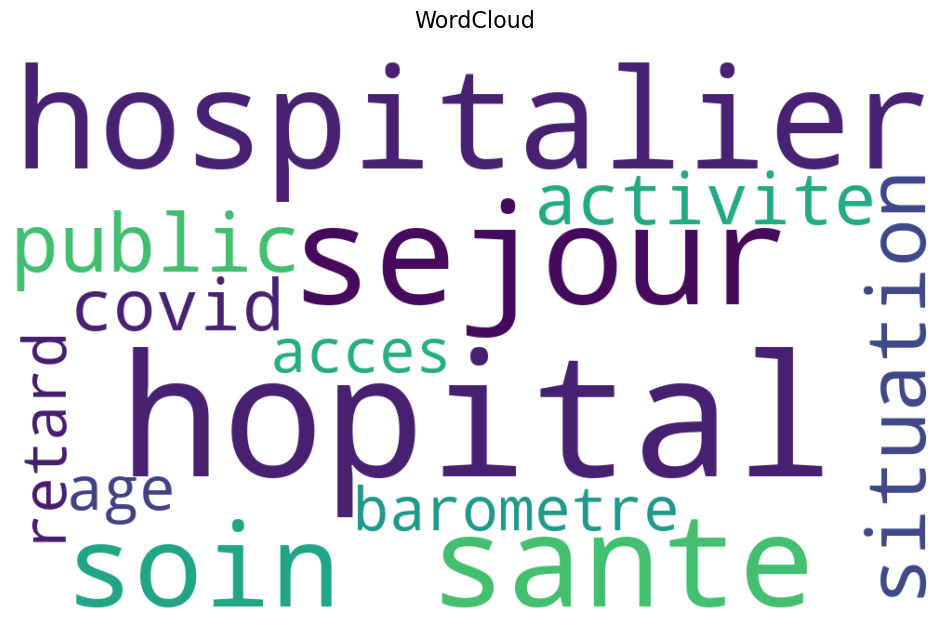

In [12]:
# Création du WordCloud
wordcloud = WordCloud(
    width=1000, 
    height=600, 
    background_color='white', 
    colormap='viridis',          
    max_words=13,    # Limité à 13 mots          
    min_font_size=10,         
    random_state=42           
).generate_from_frequencies(freq)

# Affichage avec Matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud", fontsize=16, pad=20) 
plt.show()